In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_triangular, cholesky

In [2]:
# For better plots
plt.rcParams.update({"figure.figsize":(10,10), "font.size":20, "lines.markersize":10})
def plot_smth(ax,x,y,xlabel='x',ylabel='y',label=None):
    ax.scatter(x,y,label=label)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.grid()
    ax.legend()

In [3]:
def least_squares_pinv(A, b):
    x =  np.linalg.pinv(A) @ b
#     x =  np.linalg.inv(A.T @ A) @ A.T @ b 
    return x

def least_squares_Cholesky(A, b):
    N = A.T @ A # form normal matrix x^TA^TAx = ||Ax||^2
    d = A.T @ b # modify right-hand side
    L = cholesky(N, lower=True) # perform Cholesky factorization
    y = solve_triangular(L, d, lower=True) # solve L y = d
    x = solve_triangular(L.T, y) # solve L^T x = y
    return x

def least_squares_QR(A, b):
    Q, R = np.linalg.qr(A) # perform QR factorization
    d = Q.T @ b # modify right-hand side
    x = solve_triangular(R, d) # solve R x = d
    return x

def least_squares_SVD(A, b):
    U, Sigma, V = np.linalg.svd(A, full_matrices=False) # perform SVD factorization
    d = U.T @ b # modify right-hand side
    x = V.T @ (d/Sigma) # solve Sigma V x = d
    return x

# Tests

In [4]:
A = np.random.randn(100, 10)
b = np.random.randn(100)

x1, x2, x3, x4 = least_squares_pinv(A, b), least_squares_Cholesky(A, b), \
                 least_squares_QR(A, b), least_squares_SVD(A, b)

one_two = np.allclose(x1, x2)
two_three = np.allclose(x2, x3)
three_four = np.allclose(x3, x4)
one_four = np.allclose(x1, x4)

print(f"Pseudo-inverse agrees with Cholesky: {one_two}")
print(f"Cholesky agrees with QR: {two_three}")
print(f"QR agrees with SVD: {three_four}")
print(f"SVD agrees with pseudo-inverse: {one_four}")

Pseudo-inverse agrees with Cholesky: True
Cholesky agrees with QR: True
QR agrees with SVD: True
SVD agrees with pseudo-inverse: True


# Complexity

In [11]:
M

array([   10000,    21544,    46415,   100000,   215443,   464158,
        1000000,  2154434,  4641588, 10000000])

In [5]:
M = np.logspace(4, 7, 10, dtype=int)
algorithms = [least_squares_pinv, least_squares_Cholesky, 
              least_squares_QR, least_squares_SVD]
elapsed_time_m = np.zeros((10, len(algorithms)))

for j,m in enumerate(M):
    A = np.random.randn(m, 10)
    b = np.random.randn(m)
    for i,alg in enumerate(algorithms):
        start = time.time()
        x = alg(A, b)
        stop = time.time()
        T = stop - start
        elapsed_time_m[j, i] = T

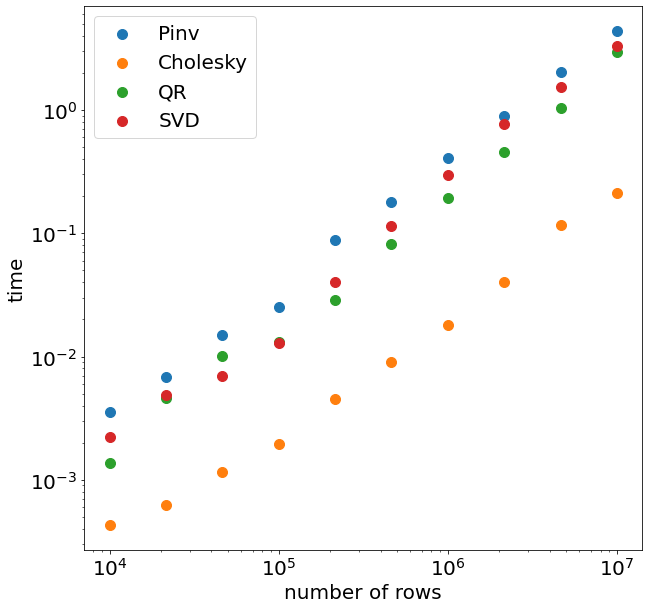

In [6]:
names = ["Pinv", "Cholesky", "QR", "SVD"]
fig, ax = plt.subplots()
for i,name in enumerate(names):
    plot_smth(ax, M, elapsed_time_m[:, i],"number of rows","time",label=name)

In [7]:
for i, name in enumerate(names):
    a,b = np.polyfit(np.log(M)[2:], np.log(elapsed_time_m[2:,i]), deg=1)
    print(f"{name:8}: logT ~ {a:.3f}log(m){str(np.sign(b))[0]}{abs(b):.3f}")

Pinv    : logT ~ 1.078log(m)-15.842
Cholesky: logT ~ 0.993log(m)-17.598
QR      : logT ~ 1.096log(m)-16.756
SVD     : logT ~ 1.191log(m)-17.820


$T\sim m$

In [8]:
N = np.logspace(1, 3, 10, dtype=int)
elapsed_time_n = np.zeros((10, len(algorithms)))

for j,n in enumerate(N):
    A = np.random.randn(2000, n)
    b = np.random.randn(2000)
    for i,alg in enumerate(algorithms):
        start = time.time()
        x = alg(A, b)
        stop = time.time()
        T = stop - start
        elapsed_time_n[j, i] = T

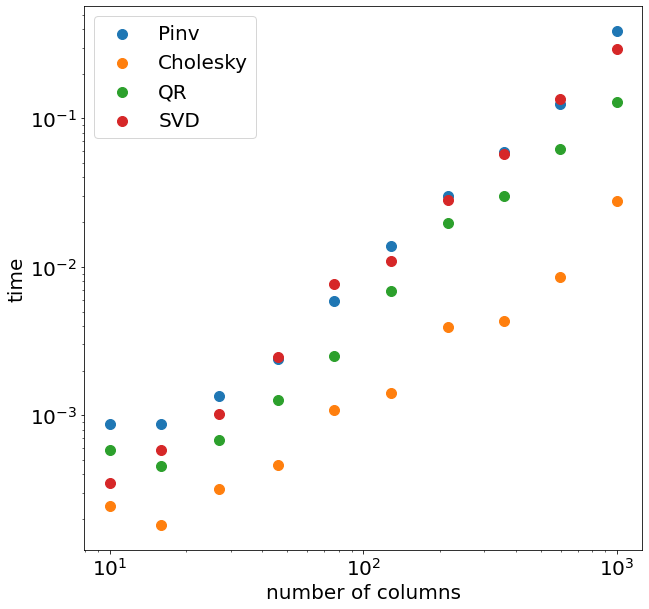

In [13]:
fig, ax = plt.subplots()
for i,name in enumerate(names):
    plot_smth(ax, N, elapsed_time_n[:, i],"number of columns","time",label=name)

In [12]:
for i, name in enumerate(names):
    a,b = np.polyfit(np.log(N)[5:], np.log(elapsed_time_n[5:, i]), deg=1)
    print(f"{name:8}: logT ~ {a:.2f}log(n){str(np.sign(b))[0]}{abs(b):.2f}")

Pinv    : logT ~ 1.58log(n)-12.01
Cholesky: logT ~ 1.31log(n)-12.90
QR      : logT ~ 1.37log(n)-11.49
SVD     : logT ~ 1.59log(n)-12.19


$ T \sim n^{1.4}$